In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
energydata = np.loadtxt("energy.data")

x = energydata[:,0]
y = energydata[:,1]
ey = energydata[:,2]
ex = 0*energydata[:,2]



In [3]:
def fit1 (x, a, b):
	return a*3/4*(x-1)**2 + b

In [4]:
def fit2 (x, a, b):
	data = (x-1)**2
	return a*3/4*data + b

In [5]:
popt1, pcov1 = curve_fit(fit1, x, y, p0=(13.6*10**(-3), 0))
popt2, pcov1 = curve_fit(fit2, x, y, p0=(13.6*10**(-3), 0))

In [6]:
print(popt1*10**3)
print(np.sqrt(np.diag(pcov1))*10**3)

[ 13.21561282 850.38474707]
[5.10667982e-01 8.67302674e+02]


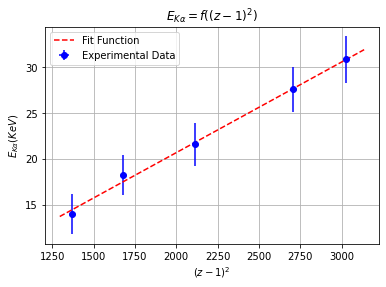

In [7]:
th = np.linspace(37, 57, 1000)
plt.errorbar((x-1)**2, y, ey, ex, 'bo')
plt.plot((th-1)**2, fit1(th, *popt1), 'r--')
plt.grid()

plt.xlabel(r'$(z-1)^2$')
plt.ylabel(r'$E_{K\alpha} (KeV)$')
plt.title(r'$E_{K\alpha} = f\left((z-1)^2\right)$')
plt.legend(['Fit Function', 'Experimental Data'])
plt.savefig('energyplot.png', dpi=500)

In [8]:
ryd_exp = 13.2
ryd_sf=0.5
ryd_theor = 13.6
print('Πειραματική τιμή σταθεράς Rydberg = ', ryd_exp, '+\-', ryd_sf)
print('Θεωρητική τιμή σταθεράς Rydberg = ', ryd_theor)
print('Ποσοστιαία απόκλιση από την θεωρητική τιμή = ', np.abs(ryd_theor-ryd_exp)/ryd_theor*100, '%')
print('Σχετική απόκλιση από την θεωρητική τιμή = ', np.abs(ryd_theor-ryd_exp)/ryd_sf, 'σ')
print('Σχετικό σφάλμα πειραματικής τιμής = ', ryd_sf/ryd_exp*100, '%')

Πειραματική τιμή σταθεράς Rydberg =  13.2 +\- 0.5
Θεωρητική τιμή σταθεράς Rydberg =  13.6
Ποσοστιαία απόκλιση από την θεωρητική τιμή =  2.941176470588238 %
Σχετική απόκλιση από την θεωρητική τιμή =  0.8000000000000007 σ
Σχετικό σφάλμα πειραματικής τιμής =  3.787878787878788 %


In [12]:
print(10**-3 * popt1)
print(10**-3 * np.sqrt(np.diag(pcov1)))


[1.32156128e-05 8.50384747e-04]
[5.10667982e-07 8.67302674e-04]
